ดาวโหลด packages และ dependies สำหรับโปรเจ็ค

In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/112.6 GB disk)


สร้าง folder เปล่าเพื่อเตรียมดาวโหลด dataset ที่อัพโหลดขึ้น Roboflow

In [ ]:
import os

HOME = os.getcwd()
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


ดาวโหลด dataset จาก Roboflow

1. ไปที่หน้าโปรเจ็คของเราบน roboflow และกดปุ่ม download dataset ตรงมุมขวาบนของ website

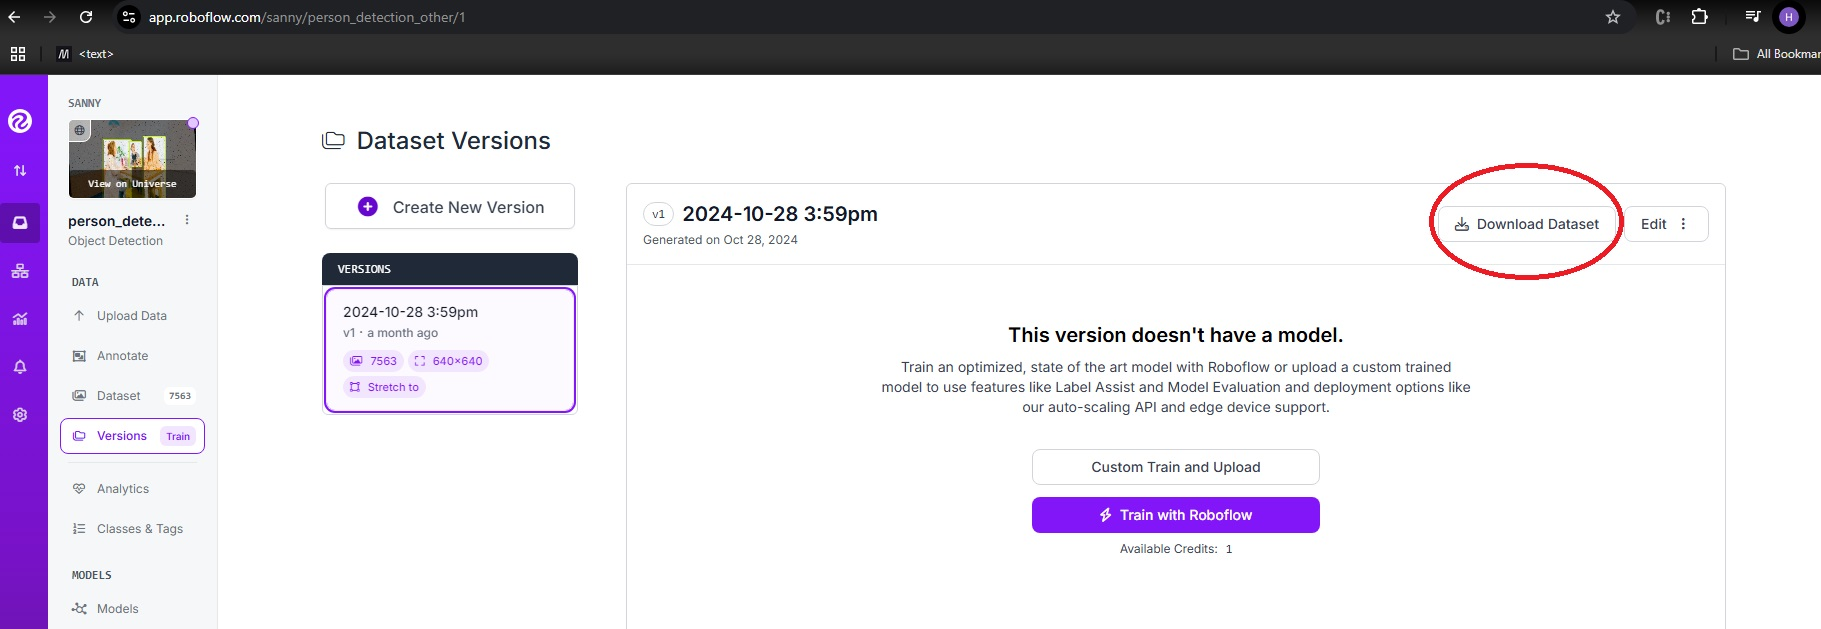


2. copy และนำมาวางทับ cell ด้านล้าง

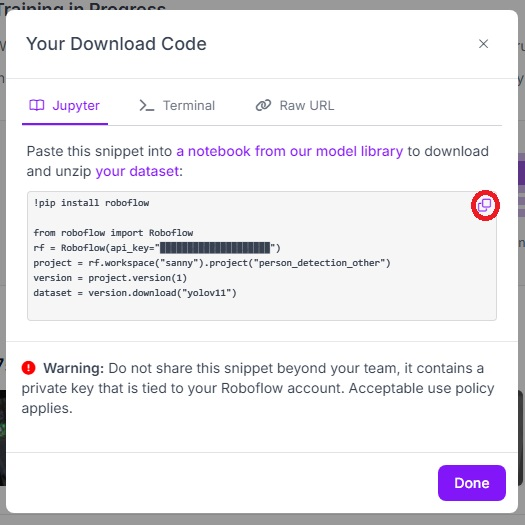

เริ่มการฝึก model

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="h9HEY6ef0VXN3hSA8y2B")
project = rf.workspace("sanny").project("men-women-child-jj6rc")
version = project.version(4)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to men-women-child--4 in yolov11:: 100%|██████████| 5307/5307 [00:00<00:00, 6916.39it/s]


'\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="h9HEY6ef0VXN3hSA8y2B")\nproject = rf.workspace("sanny").project("person_detection_other")\nversion = project.version(1)\ndataset = version.download("yolov8")\n'

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=5 imgsz=320 plots=True

/content
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/men-women-child--4/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

เช็คผล model ของเราในส่วน test dataset

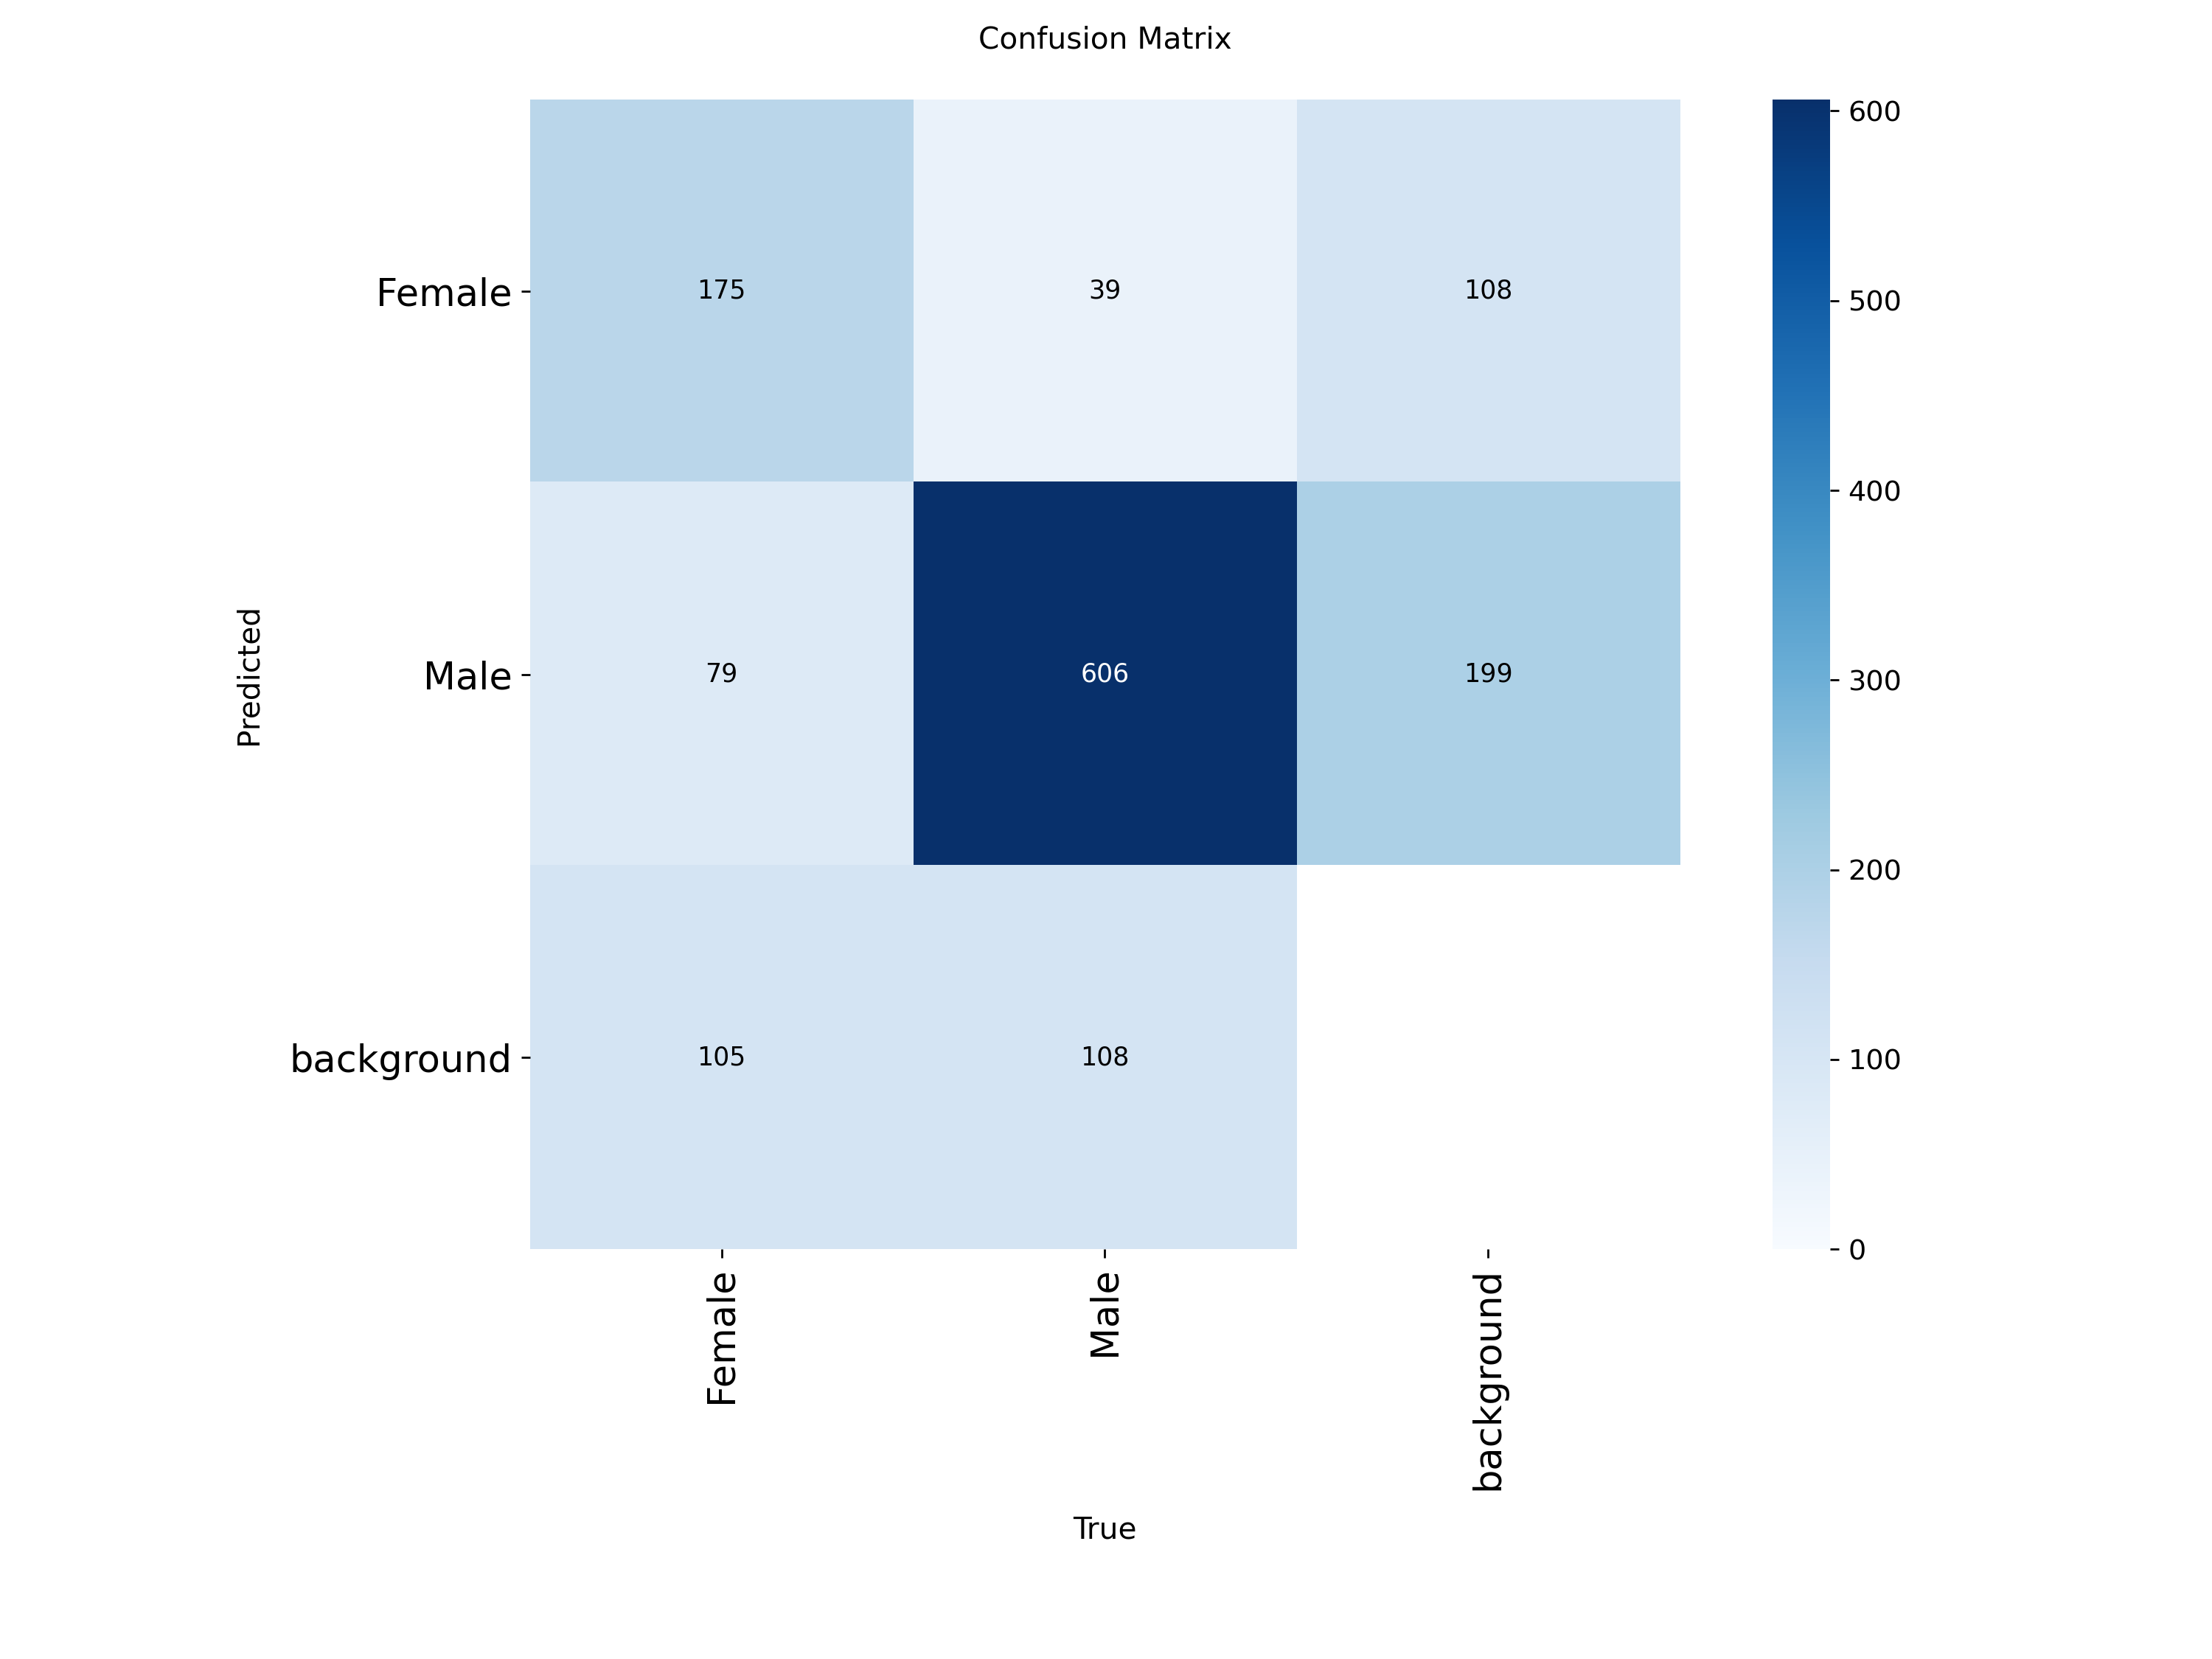

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/runs/detect/train/results.png', width=900)

ดาวโหลด model ลงบนคอมพิวเตอร์ของเรา

In [ ]:
!yolo export model={HOME}/runs/detect/train/weights/best.pt format=onnyx opset=11 simplify=False
from google.colab import files

files.download('/content/runs/detect/train/weights/best.onnx')


WARNING ⚠️ Invalid export format='onnyx', updating to format='onnx'
Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 6, 2100) (5.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.2s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.0 opset 11...
ONNX: export success ✅ 3.2s, saved as '/content/runs/detect/train/weights/best.onnx' (10.0 MB)

Export complete (3.4s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict 

In [ ]:
'''from google.colab import files

files.download('/content/runs/detect/train/weights/best.pt')
files.download('/content/runs/detect/train/weights/best.onnx')

files.download('/content/runs/detect/train/weights/best.pt')
files.download('/content/runs/detect/train/weights/best_saved_model/saved_model.pb')
files.download('/content/runs/detect/train/weights/best_saved_model/best_float16.tflite')
files.download('/content/runs/detect/train/weights/best_saved_model/best_float32.tflite')
files.download('/content/runs/detect/train/weights/best_saved_model/metadata.yaml')

!yolo export model={HOME}/runs/detect/train/weights/best.pt format=tflite int8

files.download('/content/runs/detect/train/weights/best_saved_model/best_full_integer_quant.tflite')
files.download('/content/runs/detect/train/weights/best_saved_model/best_int8.tflite')
files.download('/content/runs/detect/train/weights/best_saved_model/best_integer_quant.tflite')
'''


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>